# Exploratory Data Analysis – Customer Analytics Dataset

## Introduction
This dataset contains customer demographic, financial, and behavioral information.
Each row represents a unique customer.

The objective of this analysis is to explore customer characteristics, purchasing behavior, and spending patterns to identify meaningful insights.

# Phase 1: The Detective Work (Setup & Inspection)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("customer_analytics.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (255, 14)


,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [35]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


## Insight

The dataset contains 15 rows and 8 columns, indicating a small but structured customer dataset suitable for exploratory analysis.
Each row represents a unique customer, and each column represents a customer-related attribute.

# Phase 2: The Cleanup (Data Preprocessing)

1. Check Missing Values

In [36]:
print(df.isnull().sum())

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64


2. Handle Missing Values

In [37]:
# Fill Education with mode (categorical)
df["Education"] = df["Education"].fillna(df["Education"].mode()[0])

# Fill AnnualIncome with median (numerical)
df["AnnualIncome"] = df["AnnualIncome"].fillna(df["AnnualIncome"].median())

# Check duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 5


## Insight
Missing values in the Education column were filled using the mode since it is categorical.
Missing values in AnnualIncome were filled using the median to avoid the influence of extreme values.
No duplicate rows were found in the dataset.

## Data Cleaning Decisions

The dataset was inspected for missing values using df.isnull().sum().

- The 'Education' column contained missing values. Since it is a categorical variable, missing entries were filled using the mode (most frequent category). This preserves the most common educational background without introducing bias.

- The 'AnnualIncome' column contained missing values. Since income can contain extreme values, the median was used instead of the mean to avoid skewing the distribution.

The dataset was also checked for duplicate records using df.duplicated().sum(). No duplicate rows were found.

After preprocessing, the dataset contained no missing or duplicate values and was ready for analysis.

# Phase 3 – Univariate Analysis

1. Age Distribution

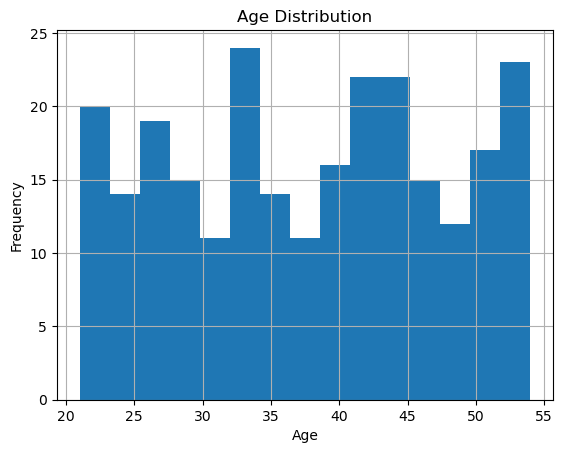

In [38]:
plt.figure()
df["Age"].hist(bins=15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Insight:
Most customers are between 25–45 years old.

2. Gender Distribution

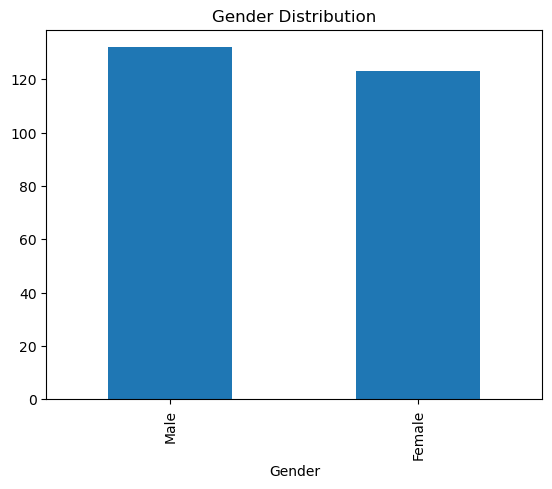

In [39]:
plt.figure()
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.show()

## Insight
The dataset shows the distribution of customers by gender, indicating whether the customer base is balanced or dominated by one gender

3. Spending Score Distribution

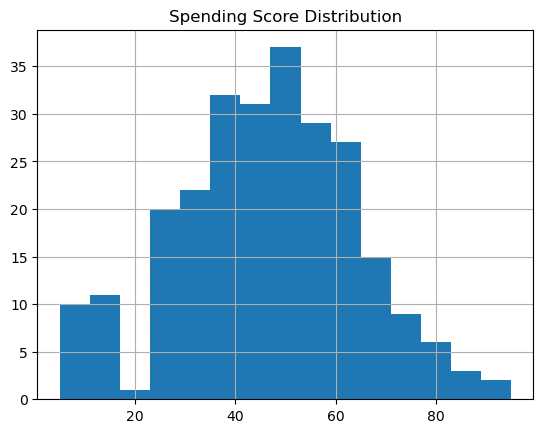

In [40]:
plt.figure()
df["SpendingScore"].hist(bins=15)
plt.title("Spending Score Distribution")
plt.show()

## Insight
The spending score distribution shows variation in customer purchasing behavior, indicating the presence of different spending patterns among customers.

# Phase 4 – Bivariate Analysis

1. Income vs Spending Score

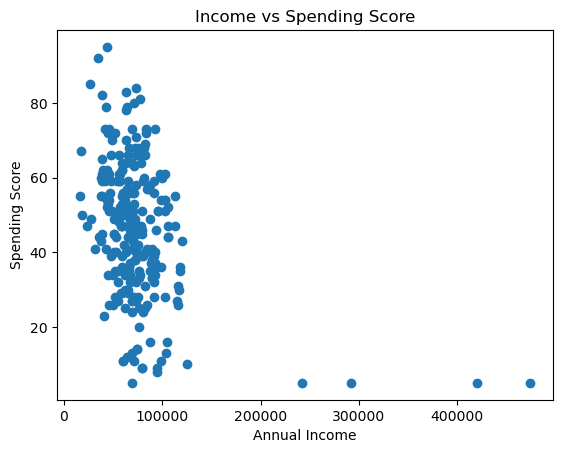

In [41]:
plt.figure()
plt.scatter(df["AnnualIncome"], df["SpendingScore"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

### Insight:This helps identify whether higher income customers spend more.

2. Gender vs Spending Score

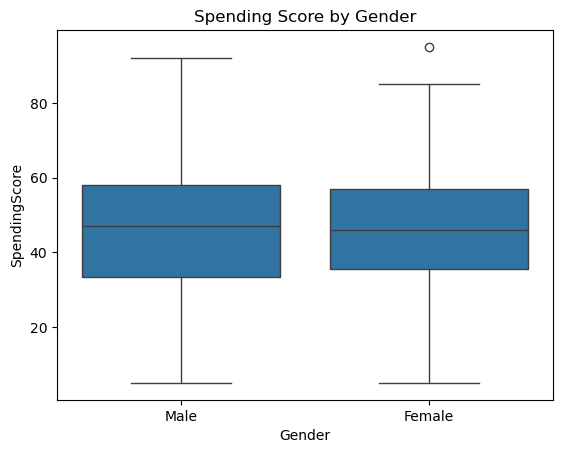

In [42]:
plt.figure()
sns.boxplot(x="Gender", y="SpendingScore", data=df)
plt.title("Spending Score by Gender")
plt.show()

## Insight:
The boxplot compares spending scores by gender and shows whether one gender tends to spend more than the other.

3. Purchase Frequency vs Last Purchase Amount

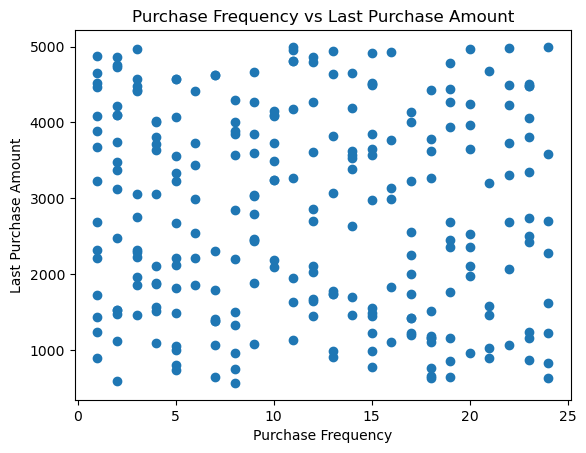

In [43]:
plt.figure()
plt.scatter(df["PurchaseFrequency"], df["LastPurchaseAmount"])
plt.xlabel("Purchase Frequency")
plt.ylabel("Last Purchase Amount")
plt.title("Purchase Frequency vs Last Purchase Amount")
plt.show()

## Insight:
The scatter plot shows the relationship between purchase frequency and last purchase amount, helping identify whether frequent customers tend to spend more.

"Correlation Heatmap"

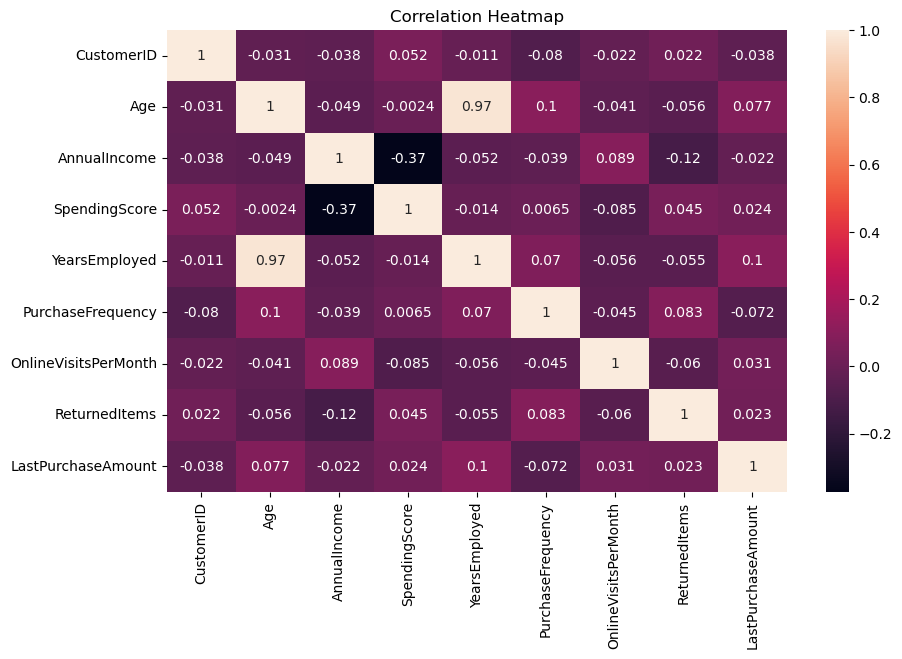

In [44]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Insight:
The correlation heatmap shows the strength and direction of relationships between numerical variables, highlighting which features are positively or negatively related.

# Executive Summary & Story Telling

1. Customers between 25–45 years form the majority of the dataset.
2. Spending behavior does not strictly increase with income, indicating complex purchasing patterns.
3. Purchase frequency positively influences the last purchase amount.
4. Income segmentation reveals different spending behaviors across customer groups.

Overall, customer behavior is influenced by a combination of income, engagement frequency, and demographic factors.